# **Chapter 3. Python 을 활용한 데이터 전처리** 





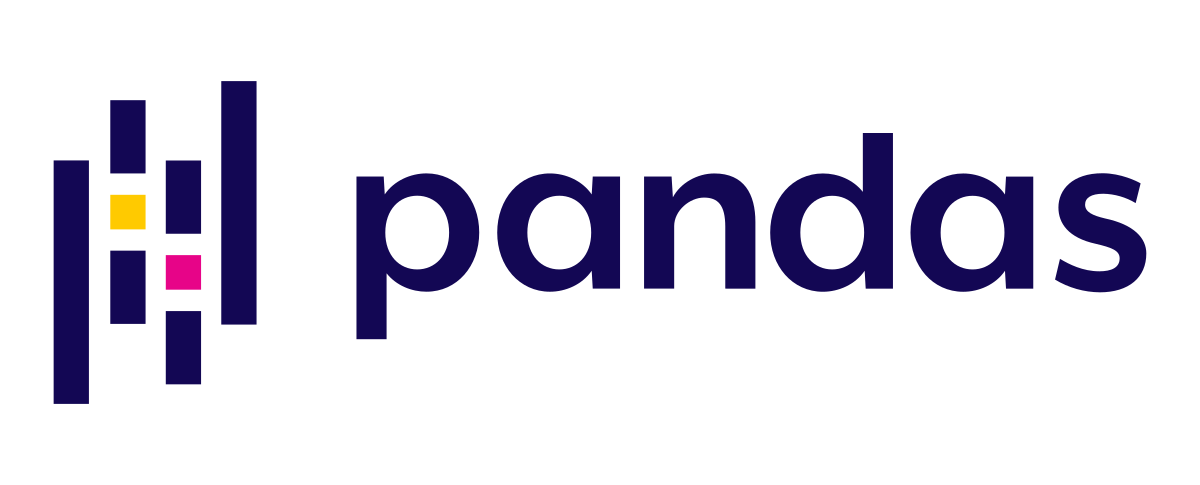


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge, Concat) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> **3-11. 전처리의 기본! 결측값, 중복 처리** <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-11. 결측값, 중복 처리

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np

In [ ]:
# 실습 파일 로딩 (아이돌 프로필)
df = pd.read_csv('https://bit.ly/3gRXTfD')

In [ ]:
# 상위 10개 정보 사용
df = df.iloc[15:30]

In [ ]:
df = df[['K. Stage Name', 'Date of Birth', 'Group', 'Height', 'Weight', 'Birthplace']]
df

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
15,소유,1992-02-12,SISTAR,0,0,NaN
16,다솜,1993-05-06,SISTAR,0,0,NaN
17,지현,1990-01-09,4minute,167,0,Seoul
18,가윤,1990-05-18,4minute,165,0,Seoul
19,지윤,1990-10-15,4minute,165,0,Seoul
20,현아,1992-06-06,4minute,164,0,Jeolla
21,소현,1994-08-30,4minute,162,0,Seoul
22,지민,1991-01-08,NaN,160,43,Seoul
23,초아,1990-03-06,NaN,160,42,Incheon
24,유나,1992-12-30,AoA,163,45,Busan


> ###  **3-11-1. 결측값 처리**


> 결측값이란? 
> - 자료가 입력되지 않은 값, **입력이 누락된 값**을 의미합니다.
> - 현실의 **거의 모든 데이터에는 결측값이 존재**할 수 있습니다.
> - 결측값을 어떤 방식으로 처리하느냐에 따라 **데이터 분석 결과가 달라질 수 있습니다.**
> - **NaN, N/A, NULL, 0값** 등 다양한 방식으로 불리고 있습니다.

> **1. 데이터 탐색**

In [ ]:
df

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
15,소유,1992-02-12,SISTAR,0,0,NaN
16,다솜,1993-05-06,SISTAR,0,0,NaN
17,지현,1990-01-09,4minute,167,0,Seoul
18,가윤,1990-05-18,4minute,165,0,Seoul
19,지윤,1990-10-15,4minute,165,0,Seoul
20,현아,1992-06-06,4minute,164,0,Jeolla
21,소현,1994-08-30,4minute,162,0,Seoul
22,지민,1991-01-08,NaN,160,43,Seoul
23,초아,1990-03-06,NaN,160,42,Incheon
24,유나,1992-12-30,AoA,163,45,Busan


In [ ]:
# 0값을 NaN 형으로 변환
df = df.replace(0, np.NaN)

In [ ]:
df

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
15,소유,1992-02-12,SISTAR,NaN,NaN,NaN
16,다솜,1993-05-06,SISTAR,NaN,NaN,NaN
17,지현,1990-01-09,4minute,167.0,NaN,Seoul
18,가윤,1990-05-18,4minute,165.0,NaN,Seoul
19,지윤,1990-10-15,4minute,165.0,NaN,Seoul
20,현아,1992-06-06,4minute,164.0,NaN,Jeolla
21,소현,1994-08-30,4minute,162.0,NaN,Seoul
22,지민,1991-01-08,NaN,160.0,43.0,Seoul
23,초아,1990-03-06,NaN,160.0,42.0,Incheon
24,유나,1992-12-30,AoA,163.0,45.0,Busan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 15 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   K. Stage Name  15 non-null     object 
 1   Date of Birth  15 non-null     object 
 2   Group          11 non-null     object 
 3   Height         13 non-null     float64
 4   Weight         8 non-null      float64
 5   Birthplace     12 non-null     object 
dtypes: float64(2), object(4)
memory usage: 852.0+ bytes


> **2. 결측 데이터 확인 (`isnull()`, `notnull()`)**

In [ ]:
df.isnull()

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
15,False,False,False,True,True,True
16,False,False,False,True,True,True
17,False,False,False,False,True,False
18,False,False,False,False,True,False
19,False,False,False,False,True,False
20,False,False,False,False,True,False
21,False,False,False,False,True,False
22,False,False,True,False,False,False
23,False,False,True,False,False,False
24,False,False,False,False,False,False


In [ ]:
df.notnull()

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
15,True,True,True,False,False,False
16,True,True,True,False,False,False
17,True,True,True,True,False,True
18,True,True,True,True,False,True
19,True,True,True,True,False,True
20,True,True,True,True,False,True
21,True,True,True,True,False,True
22,True,True,False,True,True,True
23,True,True,False,True,True,True
24,True,True,True,True,True,True


In [ ]:
# 결측인 값은 (True) 1로 처리
df.isnull().sum()

K. Stage Name    0
Date of Birth    0
Group            4
Height           2
Weight           7
Birthplace       3
dtype: int64

> **3. 결측 데이터 제거 (`dropna()`)**

In [ ]:
# 기본적으로 결측인 값이 존재하면 행 모두 삭제합니다,
df.dropna()

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
24,유나,1992-12-30,AoA,163.0,45.0,Busan
26,혜정,1993-08-10,AoA,170.0,48.0,Seoul
28,설현,1995-01-03,AoA,167.0,47.0,Bucheon
29,찬미,1996-06-19,AoA,166.0,47.0,Gumi


In [ ]:
# subset=['컬럼명'] 옵션을 지정하면 해당 컬럼만 검사합니다.
df.dropna(subset=['Group'])

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
15,소유,1992-02-12,SISTAR,NaN,NaN,NaN
16,다솜,1993-05-06,SISTAR,NaN,NaN,NaN
17,지현,1990-01-09,4minute,167.0,NaN,Seoul
18,가윤,1990-05-18,4minute,165.0,NaN,Seoul
19,지윤,1990-10-15,4minute,165.0,NaN,Seoul
20,현아,1992-06-06,4minute,164.0,NaN,Jeolla
21,소현,1994-08-30,4minute,162.0,NaN,Seoul
24,유나,1992-12-30,AoA,163.0,45.0,Busan
26,혜정,1993-08-10,AoA,170.0,48.0,Seoul
28,설현,1995-01-03,AoA,167.0,47.0,Bucheon


In [ ]:
# subset=['컬럼명'] 옵션을 지정하면 해당 컬럼만 검사합니다.
df.dropna(subset=['Group', 'Height'])

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
17,지현,1990-01-09,4minute,167.0,NaN,Seoul
18,가윤,1990-05-18,4minute,165.0,NaN,Seoul
19,지윤,1990-10-15,4minute,165.0,NaN,Seoul
20,현아,1992-06-06,4minute,164.0,NaN,Jeolla
21,소현,1994-08-30,4minute,162.0,NaN,Seoul
24,유나,1992-12-30,AoA,163.0,45.0,Busan
26,혜정,1993-08-10,AoA,170.0,48.0,Seoul
28,설현,1995-01-03,AoA,167.0,47.0,Bucheon
29,찬미,1996-06-19,AoA,166.0,47.0,Gumi


> **4-1. 결측 데이터 치환 (`fillna()`)**
> - 결측 값을 대체하주는 함수입니다. **`fillna('결측값을 대체할 값')`** 형태로 사용합니다.

In [ ]:
df = df.dropna(subset=['Group'])
df

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
15,소유,1992-02-12,SISTAR,NaN,NaN,NaN
16,다솜,1993-05-06,SISTAR,NaN,NaN,NaN
17,지현,1990-01-09,4minute,167.0,NaN,Seoul
18,가윤,1990-05-18,4minute,165.0,NaN,Seoul
19,지윤,1990-10-15,4minute,165.0,NaN,Seoul
20,현아,1992-06-06,4minute,164.0,NaN,Jeolla
21,소현,1994-08-30,4minute,162.0,NaN,Seoul
24,유나,1992-12-30,AoA,163.0,45.0,Busan
26,혜정,1993-08-10,AoA,170.0,48.0,Seoul
28,설현,1995-01-03,AoA,167.0,47.0,Bucheon


> **4-2. 지정 값으로 대체 (`fillna('대체값')`)**

In [ ]:
# 지정 값으로 대체
df['Height'] = df['Height'].fillna(160)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
15,소유,1992-02-12,SISTAR,160.0,NaN,NaN
16,다솜,1993-05-06,SISTAR,160.0,NaN,NaN
17,지현,1990-01-09,4minute,167.0,NaN,Seoul
18,가윤,1990-05-18,4minute,165.0,NaN,Seoul
19,지윤,1990-10-15,4minute,165.0,NaN,Seoul
20,현아,1992-06-06,4minute,164.0,NaN,Jeolla
21,소현,1994-08-30,4minute,162.0,NaN,Seoul
24,유나,1992-12-30,AoA,163.0,45.0,Busan
26,혜정,1993-08-10,AoA,170.0,48.0,Seoul
28,설현,1995-01-03,AoA,167.0,47.0,Bucheon


> **4-3. 평균 값으로 대체 (`fillna('평균값')`)**

In [ ]:
# 평균 값으로 대체
mean_value = df['Weight'].mean()
df['Weight'] = df['Weight'].fillna(mean_value)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
15,소유,1992-02-12,SISTAR,160.0,46.75,NaN
16,다솜,1993-05-06,SISTAR,160.0,46.75,NaN
17,지현,1990-01-09,4minute,167.0,46.75,Seoul
18,가윤,1990-05-18,4minute,165.0,46.75,Seoul
19,지윤,1990-10-15,4minute,165.0,46.75,Seoul
20,현아,1992-06-06,4minute,164.0,46.75,Jeolla
21,소현,1994-08-30,4minute,162.0,46.75,Seoul
24,유나,1992-12-30,AoA,163.0,45.00,Busan
26,혜정,1993-08-10,AoA,170.0,48.00,Seoul
28,설현,1995-01-03,AoA,167.0,47.00,Bucheon


> **4-3. 최빈 값으로 대체 (`fillna('최빈값')`)**
> - 값을 세어주는 함수 **`value_counts()`** 를 활용하면, 최빈값을 알아낼 수 있습니다.

In [ ]:
df['Birthplace'].value_counts()

Seoul      5
Jeolla     1
Busan      1
Bucheon    1
Gumi       1
Name: Birthplace, dtype: int64

In [ ]:
df['Birthplace'].value_counts().index

Index(['Seoul', 'Jeolla', 'Busan', 'Bucheon', 'Gumi'], dtype='object')

In [ ]:
df['Birthplace'].value_counts().index[0]

'Seoul'

In [ ]:
df['Birthplace'] = df['Birthplace'].fillna(df['Birthplace'].value_counts().index[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
15,소유,1992-02-12,SISTAR,160.0,46.75,Seoul
16,다솜,1993-05-06,SISTAR,160.0,46.75,Seoul
17,지현,1990-01-09,4minute,167.0,46.75,Seoul
18,가윤,1990-05-18,4minute,165.0,46.75,Seoul
19,지윤,1990-10-15,4minute,165.0,46.75,Seoul
20,현아,1992-06-06,4minute,164.0,46.75,Jeolla
21,소현,1994-08-30,4minute,162.0,46.75,Seoul
24,유나,1992-12-30,AoA,163.0,45.00,Busan
26,혜정,1993-08-10,AoA,170.0,48.00,Seoul
28,설현,1995-01-03,AoA,167.0,47.00,Bucheon


> **5. `reset_index()` 로 인덱스 재정렬**
> - 결측치를 제거하거나, **전처리하는 과정에서 데이터 프레임의 인덱스가 바뀌는 현상은 자주 일어납니다.**
> - 이때, `reset_index()` 를 써서 마지막에 인덱스를 정렬해주면,
> - 이후에 진행하게되는 **분석과정에 문제가 발생할 확률이 줄어듭니다!**

In [ ]:
# 'drop=True' 옵션은 이전의 인덱스를 버린다는 의미입니다.
df = df.reset_index(drop=True)

In [ ]:
df

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
0,소유,1992-02-12,SISTAR,160.0,46.75,Seoul
1,다솜,1993-05-06,SISTAR,160.0,46.75,Seoul
2,지현,1990-01-09,4minute,167.0,46.75,Seoul
3,가윤,1990-05-18,4minute,165.0,46.75,Seoul
4,지윤,1990-10-15,4minute,165.0,46.75,Seoul
5,현아,1992-06-06,4minute,164.0,46.75,Jeolla
6,소현,1994-08-30,4minute,162.0,46.75,Seoul
7,유나,1992-12-30,AoA,163.0,45.00,Busan
8,혜정,1993-08-10,AoA,170.0,48.00,Seoul
9,설현,1995-01-03,AoA,167.0,47.00,Bucheon


> ###  **3-11-2. 중복값 처리**


> 중복값이란? 
> - 자료가 **중복으로 입력된 값**을 의미합니다.
> - **전체 행/열이 중복**된 경우, 혹은 **값이 중복된 경우**가 있습니다.
> - 중복값을 어떤 방식으로 처리하느냐에 따라 **데이터 분석 결과가 달라질 수 있습니다.**

In [ ]:
# 중복 데이터 임의로 생성
df = df.append(df.iloc[-1]).reset_index(drop=True)

In [ ]:
df

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
0,소유,1992-02-12,SISTAR,160.0,46.75,Seoul
1,다솜,1993-05-06,SISTAR,160.0,46.75,Seoul
2,지현,1990-01-09,4minute,167.0,46.75,Seoul
3,가윤,1990-05-18,4minute,165.0,46.75,Seoul
4,지윤,1990-10-15,4minute,165.0,46.75,Seoul
5,현아,1992-06-06,4minute,164.0,46.75,Jeolla
6,소현,1994-08-30,4minute,162.0,46.75,Seoul
7,유나,1992-12-30,AoA,163.0,45.00,Busan
8,혜정,1993-08-10,AoA,170.0,48.00,Seoul
9,설현,1995-01-03,AoA,167.0,47.00,Bucheon


> **1. 중복 데이터 탐색 (`duplicated()`)**
> - `duplicated()` 함수는 행이 완벽히 중복된 여부를 검사합니다.
> - 특정 열에 중복값이 있는지 확인을 할 수 도 있습니다.

In [ ]:
# 중복된 행 찾기
df[df.duplicated()]

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
11,찬미,1996-06-19,AoA,166.0,47.0,Gumi


In [ ]:
# 특정 열에 중복 값 찾기
df['Group'].duplicated()

0     False
1      True
2     False
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
Name: Group, dtype: bool

> **2. 중복 데이터 제거 (`drop_duplicates()`)**

In [ ]:
# 기본적으로 완벽히 중복된 행을 제거합니다.
df.drop_duplicates()

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
0,소유,1992-02-12,SISTAR,160.0,46.75,Seoul
1,다솜,1993-05-06,SISTAR,160.0,46.75,Seoul
2,지현,1990-01-09,4minute,167.0,46.75,Seoul
3,가윤,1990-05-18,4minute,165.0,46.75,Seoul
4,지윤,1990-10-15,4minute,165.0,46.75,Seoul
5,현아,1992-06-06,4minute,164.0,46.75,Jeolla
6,소현,1994-08-30,4minute,162.0,46.75,Seoul
7,유나,1992-12-30,AoA,163.0,45.00,Busan
8,혜정,1993-08-10,AoA,170.0,48.00,Seoul
9,설현,1995-01-03,AoA,167.0,47.00,Bucheon


In [ ]:
# 특정 열을 기준으로 제거
df.drop_duplicates(subset= ['Group'])

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
0,소유,1992-02-12,SISTAR,160.0,46.75,Seoul
2,지현,1990-01-09,4minute,167.0,46.75,Seoul
7,유나,1992-12-30,AoA,163.0,45.00,Busan


In [ ]:
# 특정 열을 기준으로 제거 (마지막 값 남기기)
df.drop_duplicates(subset= ['Group'], keep='last')

,K. Stage Name,Date of Birth,Group,Height,Weight,Birthplace
1,다솜,1993-05-06,SISTAR,160.0,46.75,Seoul
6,소현,1994-08-30,4minute,162.0,46.75,Seoul
11,찬미,1996-06-19,AoA,166.0,47.00,Gumi
